In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [56]:
import numpy as np
import pandas as pd
import datetime as dt
import scipy.stats as st

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
# reflect the tables
Base = automap_base()
Base.prepare(autoload_with=engine)

In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
measurement = Base.classes.measurement

station = Base.classes.station


In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [10]:
first_row = session.query(measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1e5ab3fc788>,
 'id': 0,
 'tobs': 18.3,
 'prcp': 2.0,
 'station': 'USC00519397',
 'date': '2010-01-01'}

In [11]:
first_row2 = session.query(station).first()
first_row2.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1e5ab411b88>,
 'station': 'USC00519397',
 'latitude': 21.2716,
 'elevation': 0.914,
 'name': 'WAIKIKI 717.2, HI US',
 'id': 0,
 'longitude': -157.8168}

# Exploratory Precipitation Analysis

In [12]:
# Find the most recent date in the data set.
date = session.query(measurement.date).order_by(measurement.date.desc()).first()
date

('2017-08-23',)

In [13]:
conn = engine.connect()

<BarContainer object of 2021 artists>

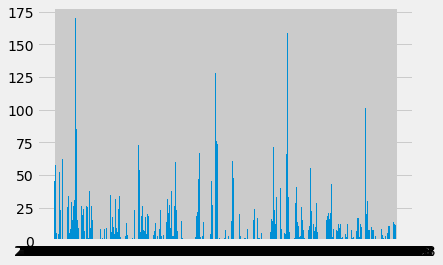

In [59]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
start_point = dt.date(2017, 8, 23) - dt.timedelta(days=365)
start_point

# Perform a query to retrieve the data and precipitation scores
dp_rain = session.query(measurement.date, measurement.prcp).filter(measurement.date >= start_point)

# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.read_sql(dp_rain.statement, conn)
#df.set_index('date', inplace=True)
# Sort the dataframe by date
df1 = df.sort_values(by='date')
df2 = df1.dropna()
# Use Pandas Plotting with Matplotlib to plot the data
y_axis = df2['prcp']
x_axis = df2['date']
plt.bar(x_axis, y_axis, align="center")



In [60]:
# Use Pandas to calcualte the summary statistics for the precipitation data
avg_prcp = np.mean(y_axis)
print(f'The mean precipitation is {avg_prcp}')
median_prcp = np.median(y_axis)
print(f'The median precipitation is {median_prcp}')
mode_prcp = st.mode(y_axis)
print(f'The mode of the precipitation is {mode_prcp}')

The mean precipitation is 4.5058881741712025
The median precipitation is 0.5
The mode of the precipitation is ModeResult(mode=array([0.]), count=array([874]))


# Exploratory Station Analysis

In [79]:
# Design a query to calculate the total number stations in the dataset
session.query(measurement.station).group_by(measurement.station).count()


9

In [78]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.

session.query(measurement.station, func.count(measurement.station)).group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [80]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
min = session.query(measurement.station, func.min(measurement.tobs)).filter(measurement.station == 'USC00519281').all()
print(f'The minimum temperature is {min}')
max = session.query(measurement.station, func.max(measurement.tobs)).filter(measurement.station == 'USC00519281').all()
print(f'The maximum temperature is {max}')
avg = session.query(measurement.station, func.avg(measurement.tobs)).filter(measurement.station == 'USC00519281').all()
print(f'The average temperature is {avg}')


The minimum temperature is [('USC00519281', 12.2)]
The maximum temperature is [('USC00519281', 29.4)]
The average temperature is [('USC00519281', 22.03582251082252)]


(array([[0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 0., ..., 0., 1., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 1., 0.]]),
 array([15.        , 16.10833333, 17.21666667, 18.325     , 19.43333333,
        20.54166667, 21.65      , 22.75833333, 23.86666667, 24.975     ,
        26.08333333, 27.19166667, 28.3       ]),
 <a list of 352 Lists of Patches objects>)

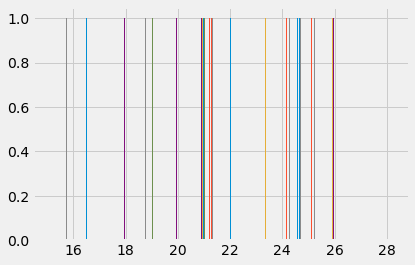

In [90]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
tobs_yr = session.query(measurement.tobs).filter(measurement.station == 'USC00519281').filter(measurement.date >= start_point).all()
#tobs_yr
plt.hist(tobs_yr, bins=12)

# Close session

In [21]:
# Close Session
session.close()